### Exercise 3.6.a

**3.6** Let $\|.\|$ denote any norm on $\mathbb{C}^m$. The corresponding _dual norm_ $\|.\|'$ is defined by the formula $\|x\|' = {sup}_{\|y\| = 1}|y^*x|$.

**(a)** Prove that $\|.\|'$ is a norm.

To prove that $\|.\|$ is a norm, we will prove the following statements:

$\begin{equation}
(1)\quad \|x\|' \geq 0 \text{, and } \|x\|' = 0 \text{ only if } x = 0, \\
(2)\quad \|x + z\|' \leq \|x\|' + \|z\|', \\
(3)\quad \|\alpha x\|' = |\alpha |\|x\|'.
\end{equation}$

**(1)**

**i.** By definition of supremum, it is always greater than or equal to the minimum of the expression in discussion. Thus,

$$\begin{align}
{sup}_{\|y\| = 1}|y^*x| &\geq {min}_{\|y\| = 1}|y^*x| = 0 \\
\|x\|' &\geq 0. \\
\end{align}$$

**ii.** If $\|x\|' = 0$, then ${sup}_{\|y\| = 1}|y^*x| = 0$. If the supremum of an absolute value expression is $0$, then the inner expression must be zero, i.e.

$${sup}_{\|y\| = 1}|y^*x| = 0 \implies (\forall y, \|y\| = 1 \implies y^*x = 0)$$

Let $\{b_1, \dots, b_m\}$ be an orthonormal basis for $\mathbb{C}^m$. Then,

$$\|b_i\| = 1 \implies b_i^*x = 0 \quad \forall i, 1 \leq i \leq m$$

Since every vector in $\mathbb{C}^m$ can be written as a linear combination of $b_i$, $x$ is orthogonal to all vectors in $\mathbb{C}^m$ and $x \in \mathbb{C}^m$. Thus, $x$ must be the zero vector.

**iii.** Conversely, if $x = 0$, then

$$\|x\|' = {sup}_{\|y\| = 1}|y^*0| = {sup}_{\|y\| = 1}0 = 0.$$

**(2)**

$$\begin{align}
\|x + z\|' & \leq \|x\|' + \|z\|' \\
{sup}_{\|y\| = 1}|y^*(x+z)| &\leq {sup}_{\|y\|=1}|y^*x| + {sup}_{\|y\|=1}|y^*x| \\
{sup}_{\|y\| = 1}|y^*x + y^*z| &\leq {sup}_{\|y\|=1}|y^*x| + {sup}_{\|y\|=1}|y^*x| \\
\end{align}$$

We can write the following inequality by one of properties of supremum function

$${sup}_{\|y\|=1}(|y^*x| + |y^*x|) \leq {sup}_{\|y\|=1}|y^*x| + {sup}_{\|y\|=1}|y^*z|$$

By the triangle inequality for scalars, we can write

$${sup}_{\|y\|=1}|y^*x + y^*z| \leq {sup}_{\|y\|=1}(|y^*x| + |y^*z|)$$

Thus, by transitivity, we conclude that

$$\begin{align}
{sup}_{\|y\|=1}|y^*x + y^*z| &\leq {sup}_{\|y\|=1}|y^*x| + {sup}_{\|y\|=1}|y^*z| \\
\|x+z\|' &\leq \|x\|' + \|y\|'.
\end{align}$$

**(3)**

$$\begin{align}
\|\alpha x\|' &= {sup}_{\|y\| = 1}|y^*(\alpha x)| \\
&= {sup}_{\|y\| = 1}|\alpha y^*x| \\
&= {sup}_{\|y\| = 1}|\alpha ||y^*x| \\
&= |\alpha |{sup}_{\|y\| = 1}|y^*x| & \textit{ since } |\alpha | \in \mathbb{R}^+ \cup \{0\}\\
&= |\alpha |\|x\|'.
\end{align}$$

### Exercise 4.5

**4.5** Theorem 4.1 asserts that every $A \in \mathbb{C}^{m \times n}$ has an SVD $A = U\Sigma V^*$. Show that if $A$ is real, then it has a real SVD ($U \in \mathbb{R}^{m \times m}$, $V \in \mathbb{R}^{n \times n}$).

Since $A$ is real, we can write

$$\begin{align}
AA^T &= U\Sigma V^*(U\Sigma V^*)^* \\
AA^T &= U\Sigma V^*V\Sigma U^* \\
AA^T &= U\Sigma^2U^*
\end{align}$$

Observe that $AA^T$ is a real matrix since both $A$ and $A^T$ are real matrices. Furthermore, $AA^T$ is a symmetric matrix

$$(AA^T)^T = (A^T)^TA^T = AA^T$$

Let $B = AA^T$. Then $B$ has an eigendecomposition

$$B = X\Lambda X^{-1} = U\Sigma^2U^*$$

Considering one arbitrary eigenvalue $\lambda$ of $B$, we prove that $B$ has real eigenvalues due to symmetricity.

$$\begin{align}
Bx &= \lambda x \\
(Bx)^* &= (\lambda x)^* \\
x^*B^* &= \bar{\lambda}x^* \\
x^*B &= \bar{\lambda}x^* & \textit{B is symmetric} \\
x^*Bx &= \bar{\lambda}x^*x \\
x^*\lambda x &= \bar{\lambda}x^*x \\
\lambda x^*x &= \bar{\lambda}x^*x \\
\lambda &= \bar{\lambda} & \textit{eigenvector x is nonzero} \\
\end{align}$$

Since both $B$ and $\lambda$ are real, we can always find real solutions to the equation

$$(B-\lambda I)x = 0$$

Thus, for any real, symmetric matrix we can find real eigenvectors. Since eigenvectors of $B$ are column vectors of $U$ due to

$$B = X\Lambda X^{-1} = U\Sigma^2U^*$$

we say that $U \in \mathbb{R}^{m \times m}$.

For $V$ we can write

$$\begin{align}
A^TA &= (U\Sigma V^*)^*U\Sigma V^* \\
A^TA &= V\Sigma U^*U\Sigma V^* \\
A^TA &= V\Sigma^2V^* \\
\end{align}$$

Since $A^TA$ is also real and symmetric, by the same reasoning, we can conclude that there is a $V \in \mathbb{R}^{n \times n}$.

### Exercise 5.3

U :
   0.70711  -0.70711
   0.70711   0.70711
S :
Diagonal Matrix

   14.1421         0
         0    7.0711
VT :
  -0.60000   0.80000
  -0.80000  -0.60000
Singular values :
   14.1421
    7.0711
Left singular vectors as column vectors :
   0.70711  -0.70711
   0.70711   0.70711
Right singular vectors as column vectors :
  -0.60000  -0.80000
   0.80000  -0.60000
1-norm :
 16
2-norm :
 14.142
Inf-norm :
 9
Frobenius-norm :
 15.811
A inverse :
   0.050000  -0.110000
   0.100000  -0.020000
Eigenvalues of A :
   1.5000 + 9.8869i
   1.5000 - 9.8869i
Eigenvalue product equals to determinant
Singular value product equals to absolute value of determinant
Area of ellipse :
 314.16


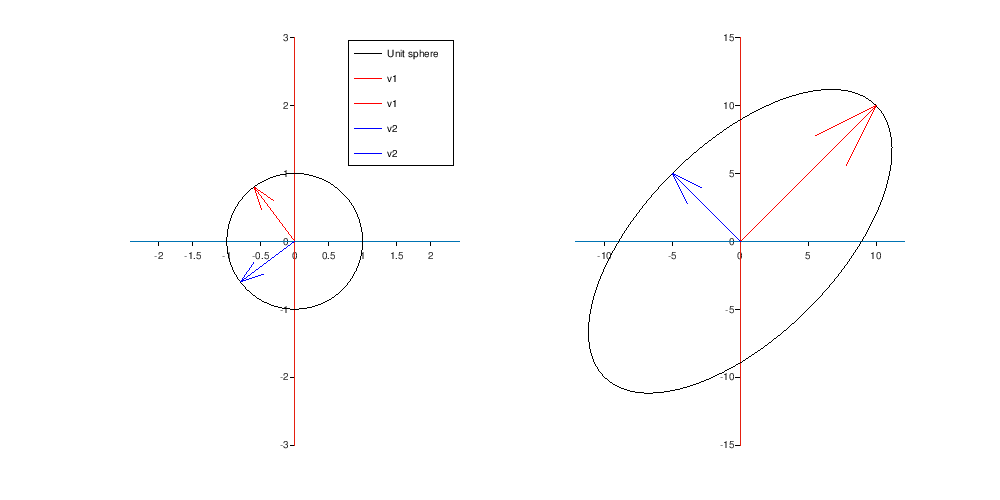

In [18]:
# Part a
A = [-2 11; -10 5];
B = A*A';
# find the eigenvalues
eig = roots([1, -(B(1)+B(4)), (B(1)*B(4)-B(2)*B(3))]);
eig = sort(eig, mode="descend");
# find the eigenvectors
x1 = null(B - diag([eig(1) eig(1)]));
x2 = null(B - diag([eig(2) eig(2)]));
# construct U and Sigma matrices
S = diag([sqrt(eig(1)) sqrt(eig(2))]);
U = [x1 x2];
# find the columns of V
v1 = linsolve(A, S(1)*U(:, 1));
v2 = linsolve(A, S(4)*U(:, 2));
V = [v1 v2];
VT = V';
disp("U :"), disp(U);
disp("S :"), disp(S);
disp("VT :"), disp(VT);
# singular values
disp("Singular values :"), disp(diag(S));
disp("Left singular vectors as column vectors :"), disp(U);
disp("Right singular vectors as column vectors :"), disp(V);

# Part b
# create unit sphere
t = linspace(0, 2*pi, 100)';
x = cos(t);
y = sin(t);
# find image of unit sphere under A
comb = horzcat(x, y);
for i = 1:size(x)
	comb(i,:) = (A*comb(i,:)')';
endfor
# give aliases to singular values/vectors
v1 = V(:,1);
v2 = V(:,2);
sigma1 = S(1);
sigma2 = S(4);
u1 = U(:,1);
u2 = U(:,2);

# plot unit sphere and right singular vectors of A
figure('Position', [0 0 1000 500]);
subplot(1, 2, 1);
plot(x, y, "color", "Black");
hold on;
quiver(0, 0, v1(1), v1(2), "color", "Red");
quiver(0, 0, v2(1), v2(2), "color", "Blue");
xlim([-3, 3]);
ylim([-3, 3]);
legend('Unit sphere', 'v1', 'v2');
axis equal;
set(gca, "xaxislocation", "origin");
set(gca, "yaxislocation", "origin");
set(gca, "box", "off");

# plot hyperellipse and left singular vectors multiplied with singular values
# which are the images of the corresponding right singular vectors
# Av1 = s1u1
# Av2 = s2u2
subplot(1, 2, 2);
plot(comb(:,1), comb(:,2), "color", "Black");
hold on;
quiver(0, 0, sigma1*u1(1), sigma1*u1(2), "color", "Red");
quiver(0, 0, sigma2*u2(1), sigma2*u2(2), "color", "Blue");
xlim([-15, 15]);
ylim([-15, 15]);
axis equal;
set(gca, "xaxislocation", "origin");
set(gca, "yaxislocation", "origin");
set(gca, "box", "off");

# Part c
# 1-norm is max column sum
disp("1-norm :"), disp(max(sum(A(:,1)), sum(A(:, 2))));
# 2-norm is maximum singular value which by convention is sigma1
disp("2-norm :"), disp(sigma1);
# Inf-norm is max row sum
disp("Inf-norm :"), disp(max(sum(A(1,:)), sum(A(2,:))));
# Frobenius norm is Frobenius norm of diagonal Sigma
disp("Frobenius-norm :"), disp(sqrt(sum(diag(S).^2)))

# Part d
# Need to find the inverse of diagonal Sigma to find A_inv.
S_inv = diag(diag(S) .^ (-1));
A_inv = V*S_inv*U';
disp("A inverse :"), disp(A_inv);

# Part e
eig_A = roots([1, -(A(1)+A(4)), (A(1)*A(4)-A(2)*A(3))]);
disp("Eigenvalues of A :"), disp(eig_A);

# Part f
detA = det(A);
eps = 0.00000001;
if abs(detA - prod(eig_A)) < eps
	disp("Eigenvalue product equals to determinant");
else
	disp("Eigenvalue product isn't equal to determinant");
endif
if abs(abs(detA) - prod(eig_A)) < eps
	disp("Singular value product equals to absolute value of determinant");
else
	disp("Singular value product isn't equal to absolute value of determinant");
endif

# Part f
disp("Area of ellipse :"), disp(pi*sigma1*sigma2);